In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [89]:
data= pd.read_csv('Metro_House_Rent.csv')


In [90]:
# Filter the data to include only rows where the city is 'Bangalore'
bangalore_data = df1[df1['city'] == 'Bangalore']

# Display the resulting table
bangalore_data.reset_index(drop=True, inplace=True)
bangalore_data.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal_allowance,furniture,association_tax,rent_amount,property_tax,fire_insurance,total_rent
0,Bangalore,Brookefield,2,2,1,8,not acept,not furnished,2475,4800,99,63,7437
1,Bangalore,Haralur Road,3,2,0,-,acept,not furnished,0,7500,450,114,8064
2,Bangalore,Sarjapur Road,2,2,1,1,not acept,not furnished,840,3000,414,39,4293
3,Bangalore,Subramanyapura,2,2,0,1,acept,furnished,2550,18000,750,231,21531
4,Bangalore,Begur Road,3,4,3,2,not acept,not furnished,7500,15450,3750,198,26898


In [91]:
bangalore_data.shape

(5887, 13)

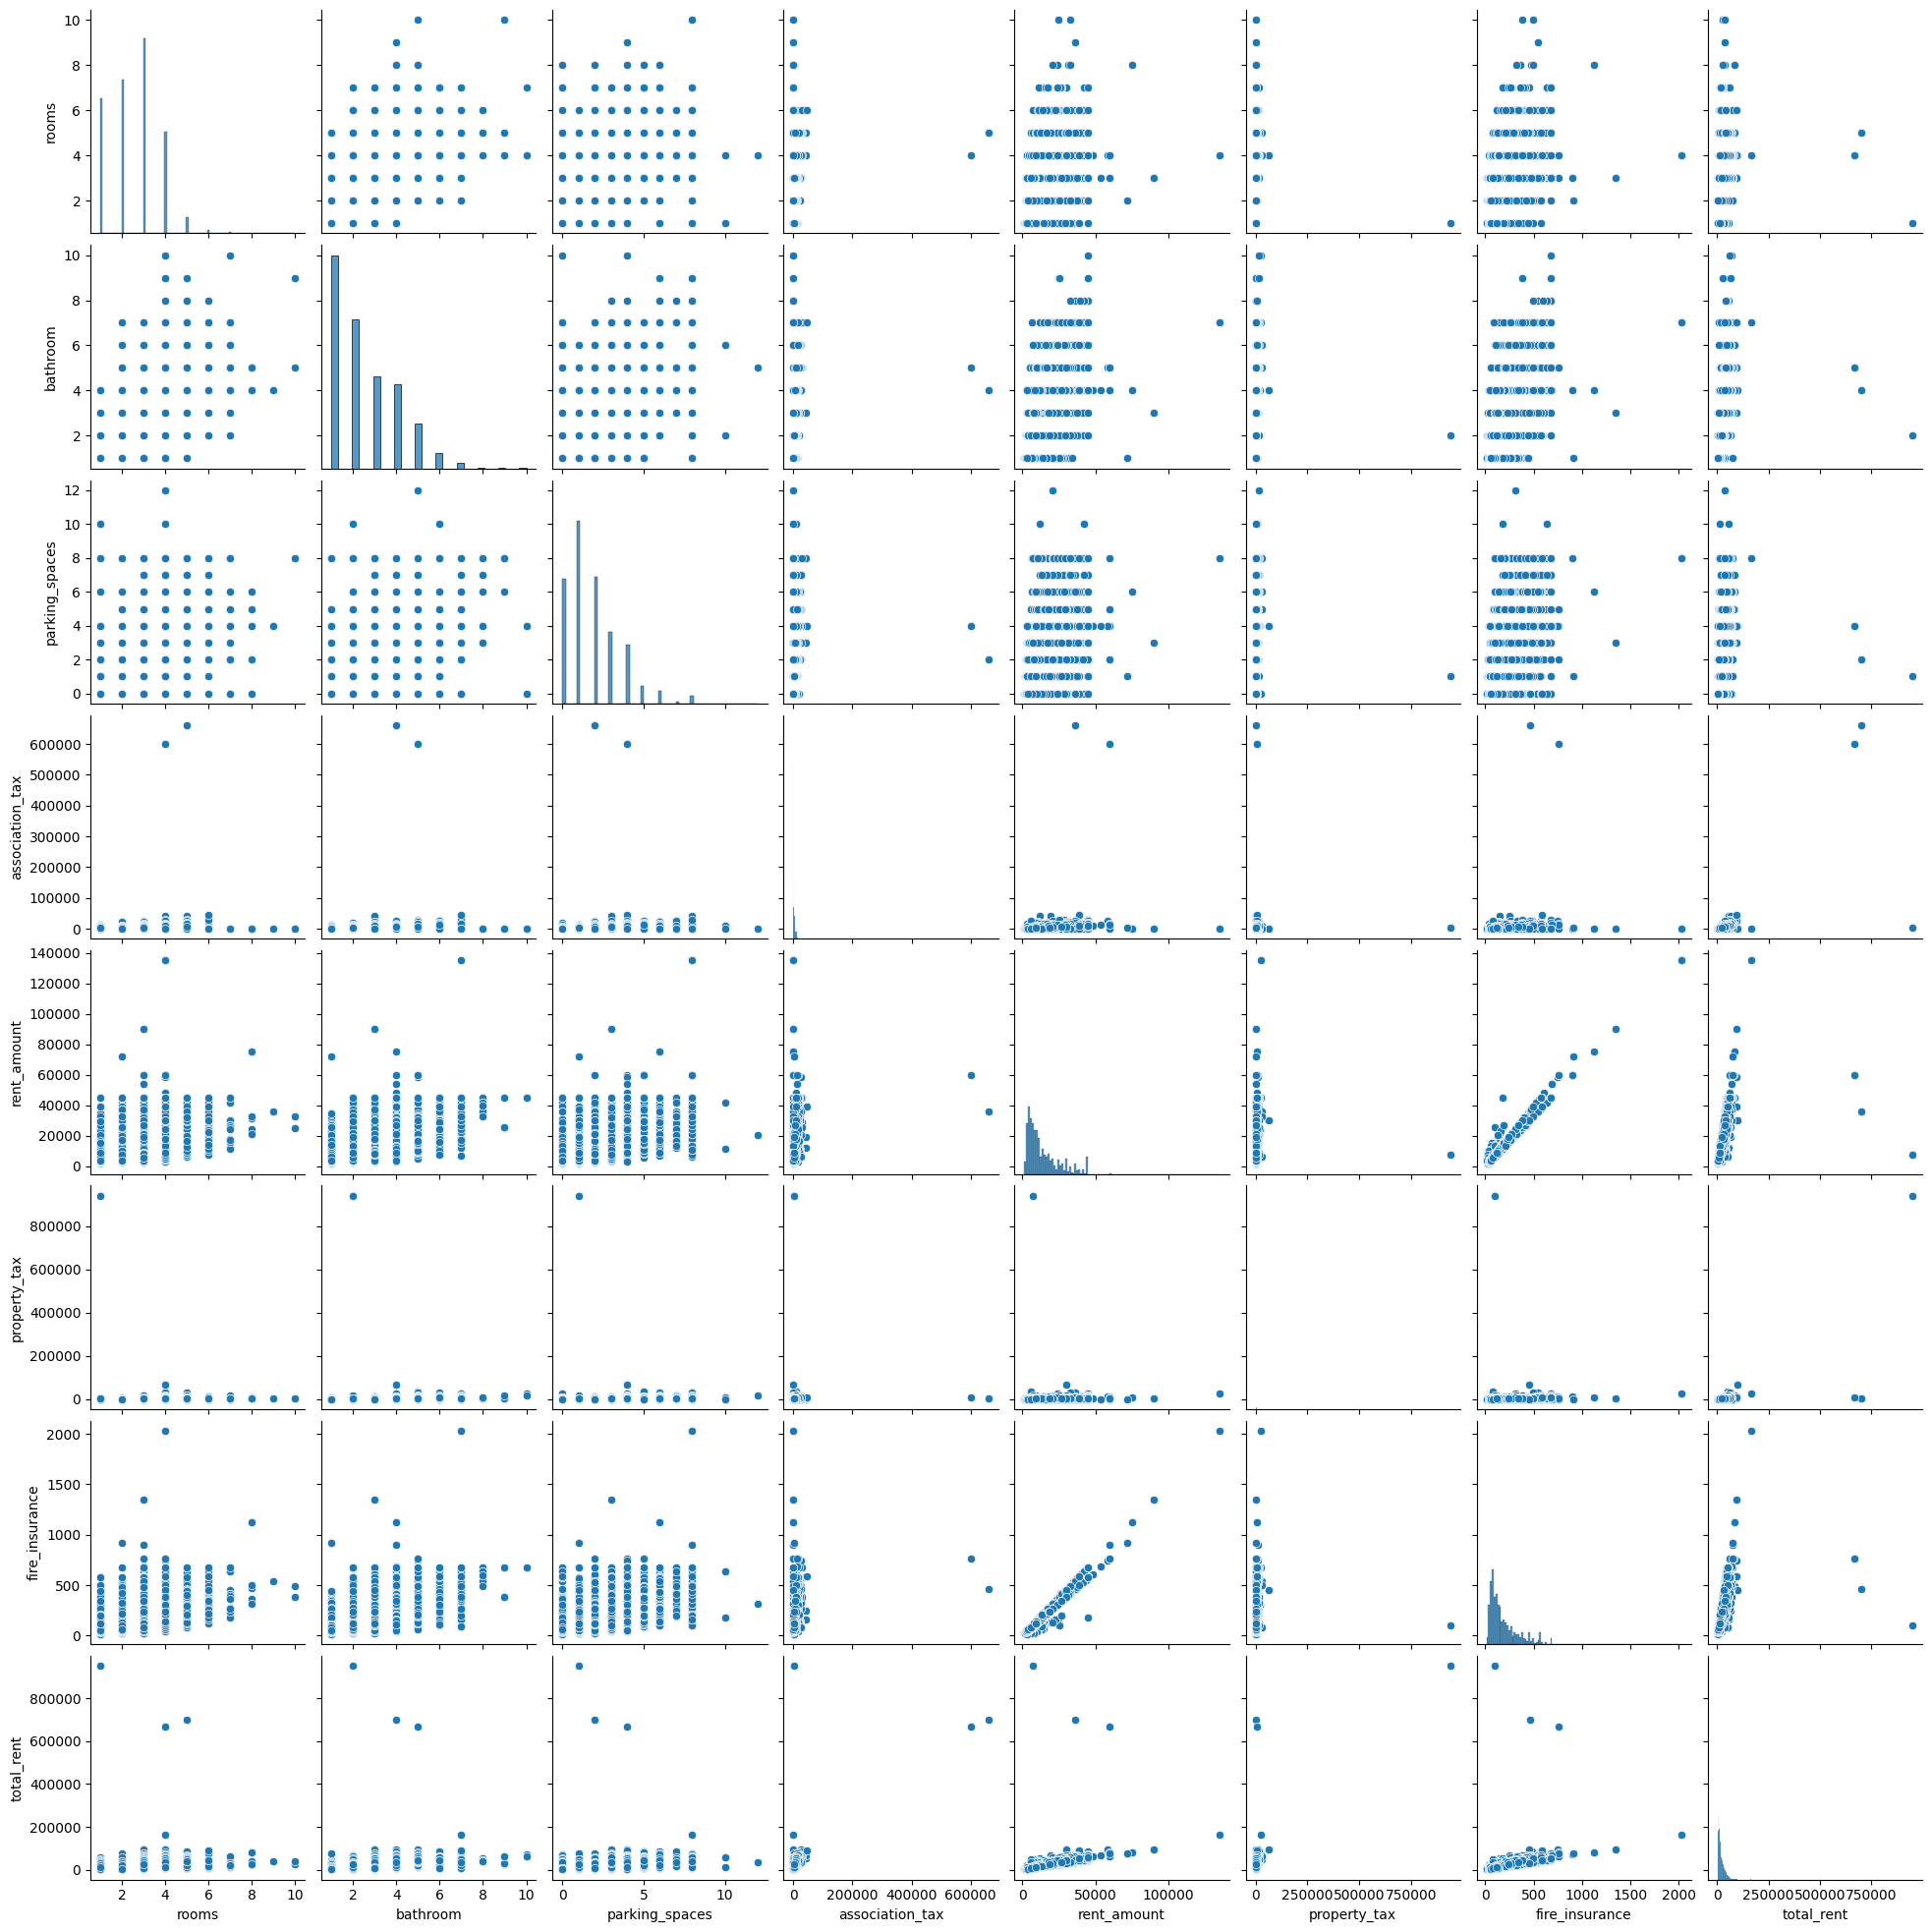

In [92]:
sns.pairplot(bangalore_data)

In [93]:
columns_to_drop = ['city', 'floor', 'animal_allowance', 'furniture', 'parking_spaces', 
                   'association_tax', 'rent_amount', 'property_tax', 'fire_insurance']
data = bangalore_data.drop(columns=columns_to_drop, errors='ignore')

In [94]:
data.shape

(5887, 4)

In [95]:
bangalore_data.isnull().sum()

city                0
area                0
rooms               0
bathroom            0
parking_spaces      0
floor               0
animal_allowance    0
furniture           0
association_tax     0
rent_amount         0
property_tax        0
fire_insurance      0
total_rent          0
dtype: int64

In [96]:
bangalore_data = data.dropna()

In [97]:
bangalore_data = pd.get_dummies(bangalore_data, columns=['area'], drop_first=True)

In [98]:
X = bangalore_data.drop(columns=['total_rent'], errors='ignore')  # Features
y = bangalore_data['total_rent']

In [99]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [108]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [109]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse}")

Test RMSE: 2.902652040024281e+17


In [110]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
param_grid = {'fit_intercept': [True, False]}  # Example parameter grid
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_scaled, y)

print("Best Cross-Validation Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Cross-Validation Score: -5.150762269427799e+35
Best Parameters: {'fit_intercept': True}


In [111]:
def predict_rent(area, rooms, bathrooms):
    # Create an array of zeros with the same number of features as X_train
    x = np.zeros(X.shape[1])
    
    # Set the values for the rooms and bathrooms
    x[0] = rooms  # Assuming 'rooms' is the first column
    x[1] = bathrooms  # Assuming 'bathrooms' is the second column

    # Handle one-hot encoding for 'area'
    area_column = f"area_{area}"
    if area_column in X.columns:
        loc_index = np.where(X.columns == area_column)[0][0]
        x[loc_index] = 1  # Set the specific area column to 1

    # Scale the input using the fitted scaler
    x_scaled = scaler.transform([x])

    # Predict the rent using the trained model
    predicted_rent = lr_model.predict(x_scaled)[0]
    return predicted_rent

# Example usage of prediction function
predicted_rent = predict_rent(area="Whitefield", rooms=3, bathrooms=2)
print(f"Predicted Rent for 3 BHK, 2 Bathrooms in Whitefield: {predicted_rent}")

Predicted Rent for 3 BHK, 2 Bathrooms in Whitefield: 8245.75


C:\Users\SAHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [115]:
predict_rent('1st Phase JP Nagar',2,2)

C:\Users\SAHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


11069.75

In [116]:
predict_rent('Yelenahalli',2,2)

C:\Users\SAHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


27807.25

In [117]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [118]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))